<h1 style = "font-size:50px; color: #9DC719;">Rental Bike Prediction</h1>

<html>
<p style="border:3px solid black;color:green;padding:10px;background-color:#E2FFF2;">
    <b style="color:Black;">Data Set Information:</b><br><br>
    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.<br><br>
    <b style="color:Black;">Attribute Information:</b><br><br>
    🔶 Date : year-month-day<br>
🔶 Rented Bike count - Count of bikes rented at each hour<br>
🔶 Hour - Hour of he day<br>
🔶 Temperature-Temperature in Celsius<br>
🔶 Humidity - %<br>
🔶 Windspeed - m/s<br>
🔶 Visibility - 10m<br>
🔶 Dew point temperature - Celsius<br>
🔶 Solar radiation - MJ/m2<br>
🔶 Rainfall - mm<br>
🔶 Snowfall - cm<br>
🔶 Seasons - Winter, Spring, Summer, Autumn<br>
🔶 Holiday - Holiday/No holiday<br>
🔶 Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)</p><br>
</html>

## Data Manipulation
### Importing required liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates=[0])

## Dataset View

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dataset Information
<p> Here we can observe diffrnt datatypes 
like int64,float64,object and datetime64 float object </p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [5]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df = df.astype({'rented bike count':'float','hour':'object'})

<h2>Summary statistics</h2>
    <p><b>Brief Information of different descriptive statistics-</b></p>
    <p>
        <ul style="color:black;background-color:#E2FFF2; padding: 5px">
            <li>
                <b>measures of Frequency</b> : Count, percent, Frequency.
            </li>
            <li>
                <b>Measures of Central Tendency</b> : Mean, Median, and mode.
            </li>
            <li>
                <b>Measures of Dispersion or Variation</b> : Range(min,max),Variance, Standard Deviation.
            </li>
            <li>
                <b>Measures of Position</b> : Percentile Ranks, Quartile Ranks.
            </li>
        </ul>
    </p>

In [8]:
df.describe().style.background_gradient()

,rented bike count,temperature,humidity,wind speed,visibility,dew point temperature,radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Checking for unique values in the dataset
<p style="background-color:#E2FFF2; padding: 10px">Different numbers of distint values in each attribute. and our target varibale is Rented bike count  <b>Rented bike count</b> attribute.</p>

In [9]:
df.nunique().sort_values(ascending = True)

holiday                     2
functioning day             2
seasons                     4
hour                       24
snowfall                   51
rainfall                   61
wind speed                 65
humidity                   90
radiation                 345
date                      365
temperature               546
dew point temperature     556
visibility               1789
rented bike count        2166
dtype: int64

## checking for missing values in each column
<p style = "background-color:#E2FFF2; padding: 10px;">No such missing values in our dataset.<br>
If you want to learn how to treat the missing values.Go through this link <a href = "https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/">Click Me</a>
    </p>

In [10]:
df.isnull().sum()

date                     0
rented bike count        0
hour                     0
temperature              0
humidity                 0
wind speed               0
visibility               0
dew point temperature    0
radiation                0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning day          0
dtype: int64

## Data visualization
<p style="background-color:#E2FFF2; padding: 10px;">Checking the data distribution of each Continuous variable</p>
<html>
<p style="font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="padding:10px;background-color:#E2FFF2;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
</html>

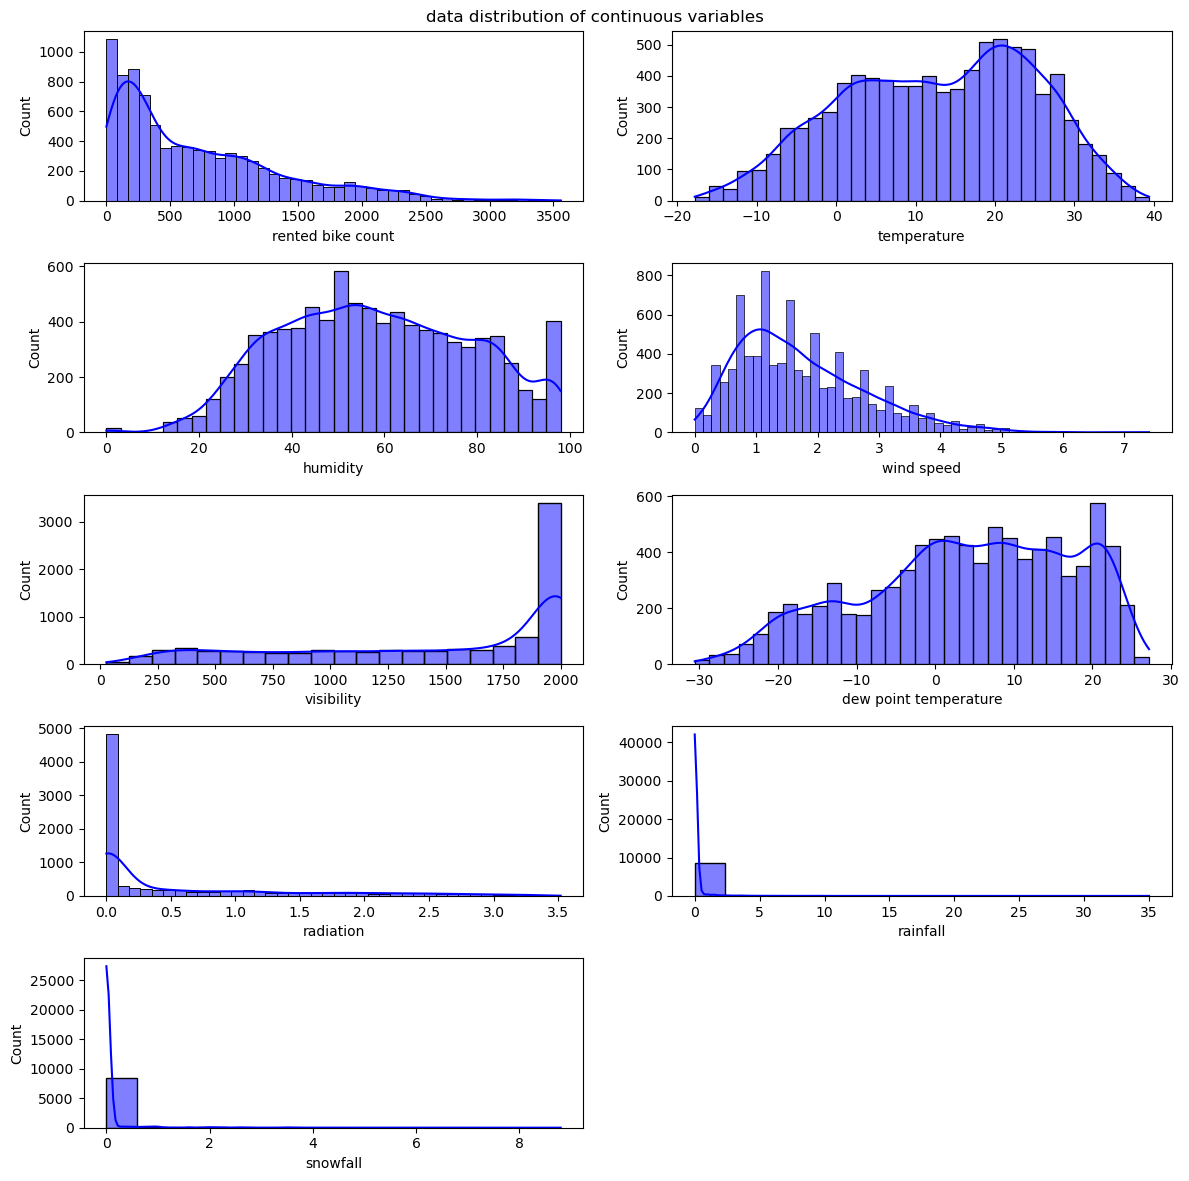

In [11]:
plt.figure(figsize= (12,12))
for i,col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = df, x = col, ax = ax, color = 'blue', kde = True)
plt.suptitle('data distribution of continuous variables')
plt.tight_layout()

<p style = "background-color:#E2FFF2; padding:10px;">from the above graph we can see that there are a lot of
attributes which are positively or negatively distrbuted.
    </p>

## Box Plot-

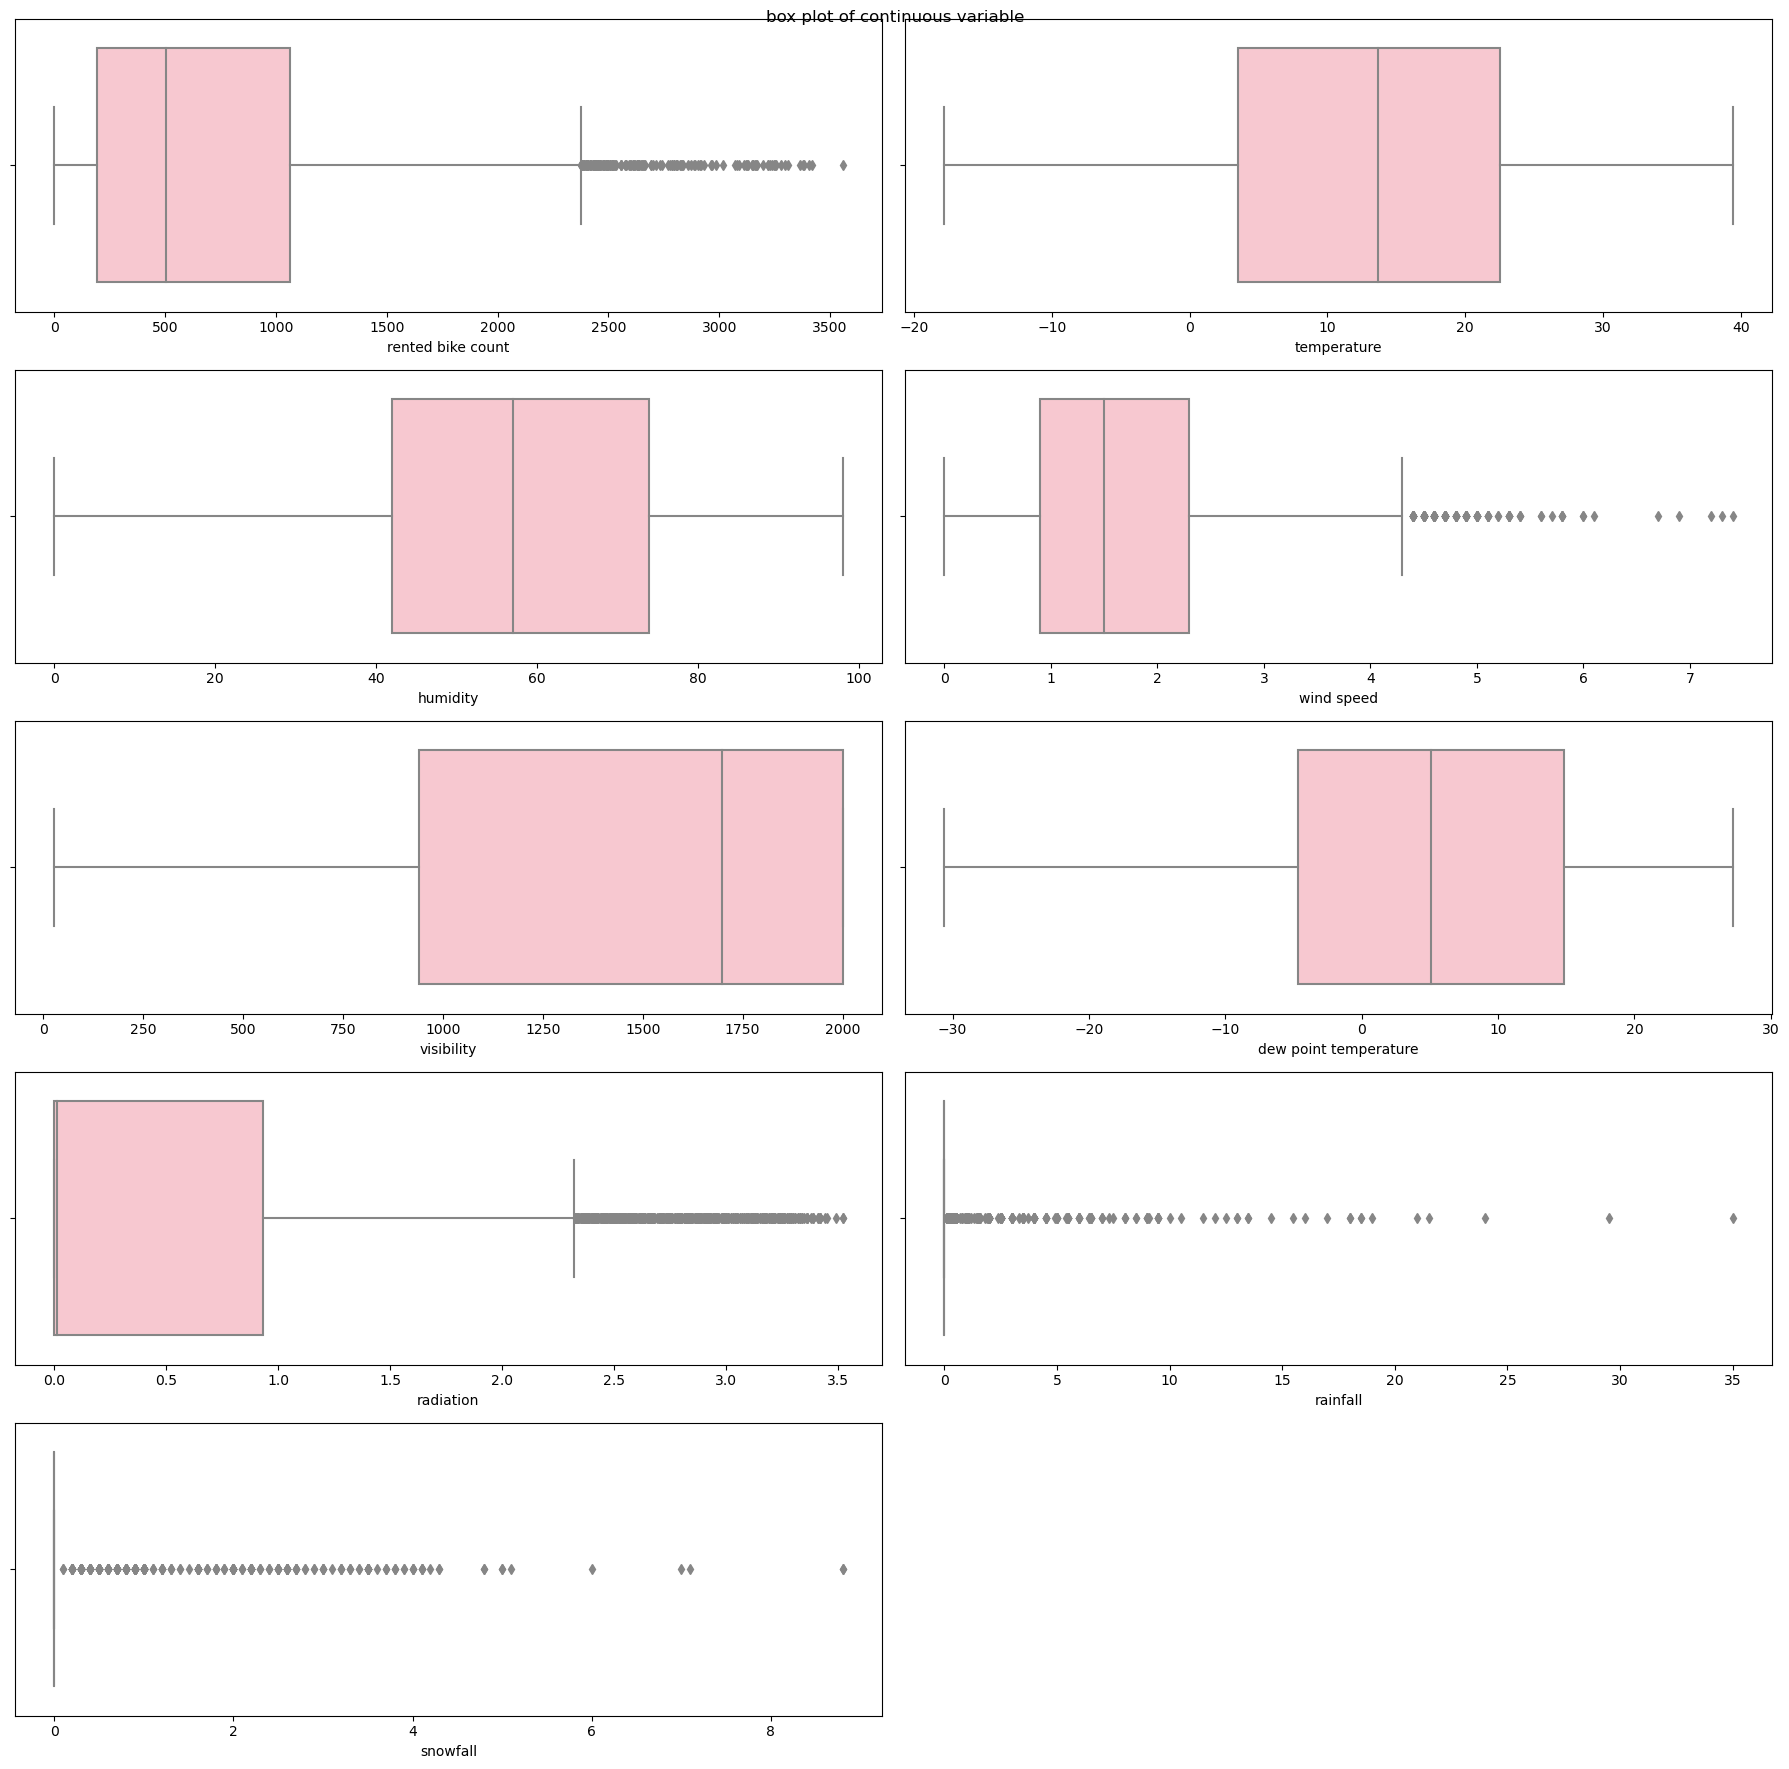

In [12]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data = df, x = col, ax = ax, color = 'pink')
plt.suptitle('box plot of continuous variable')
plt.tight_layout()

In [13]:
# selecting the variable that have data types float and Int.

num_var = list(df.select_dtypes(include = ['float64','int64']).columns)

## Now as we have selected the numerical columns,
## now we will apply transformation over these variables because they are not normally distributed

In [14]:
from sklearn.preprocessing import PowerTransformer

In [15]:
p_trans = PowerTransformer(method = 'yeo-johnson')
df[num_var] = p_trans.fit_transform(df[num_var])

## Data distribution after applying Power transformer

### Now the Distribution plots look more symmetrical after treating the outliers.

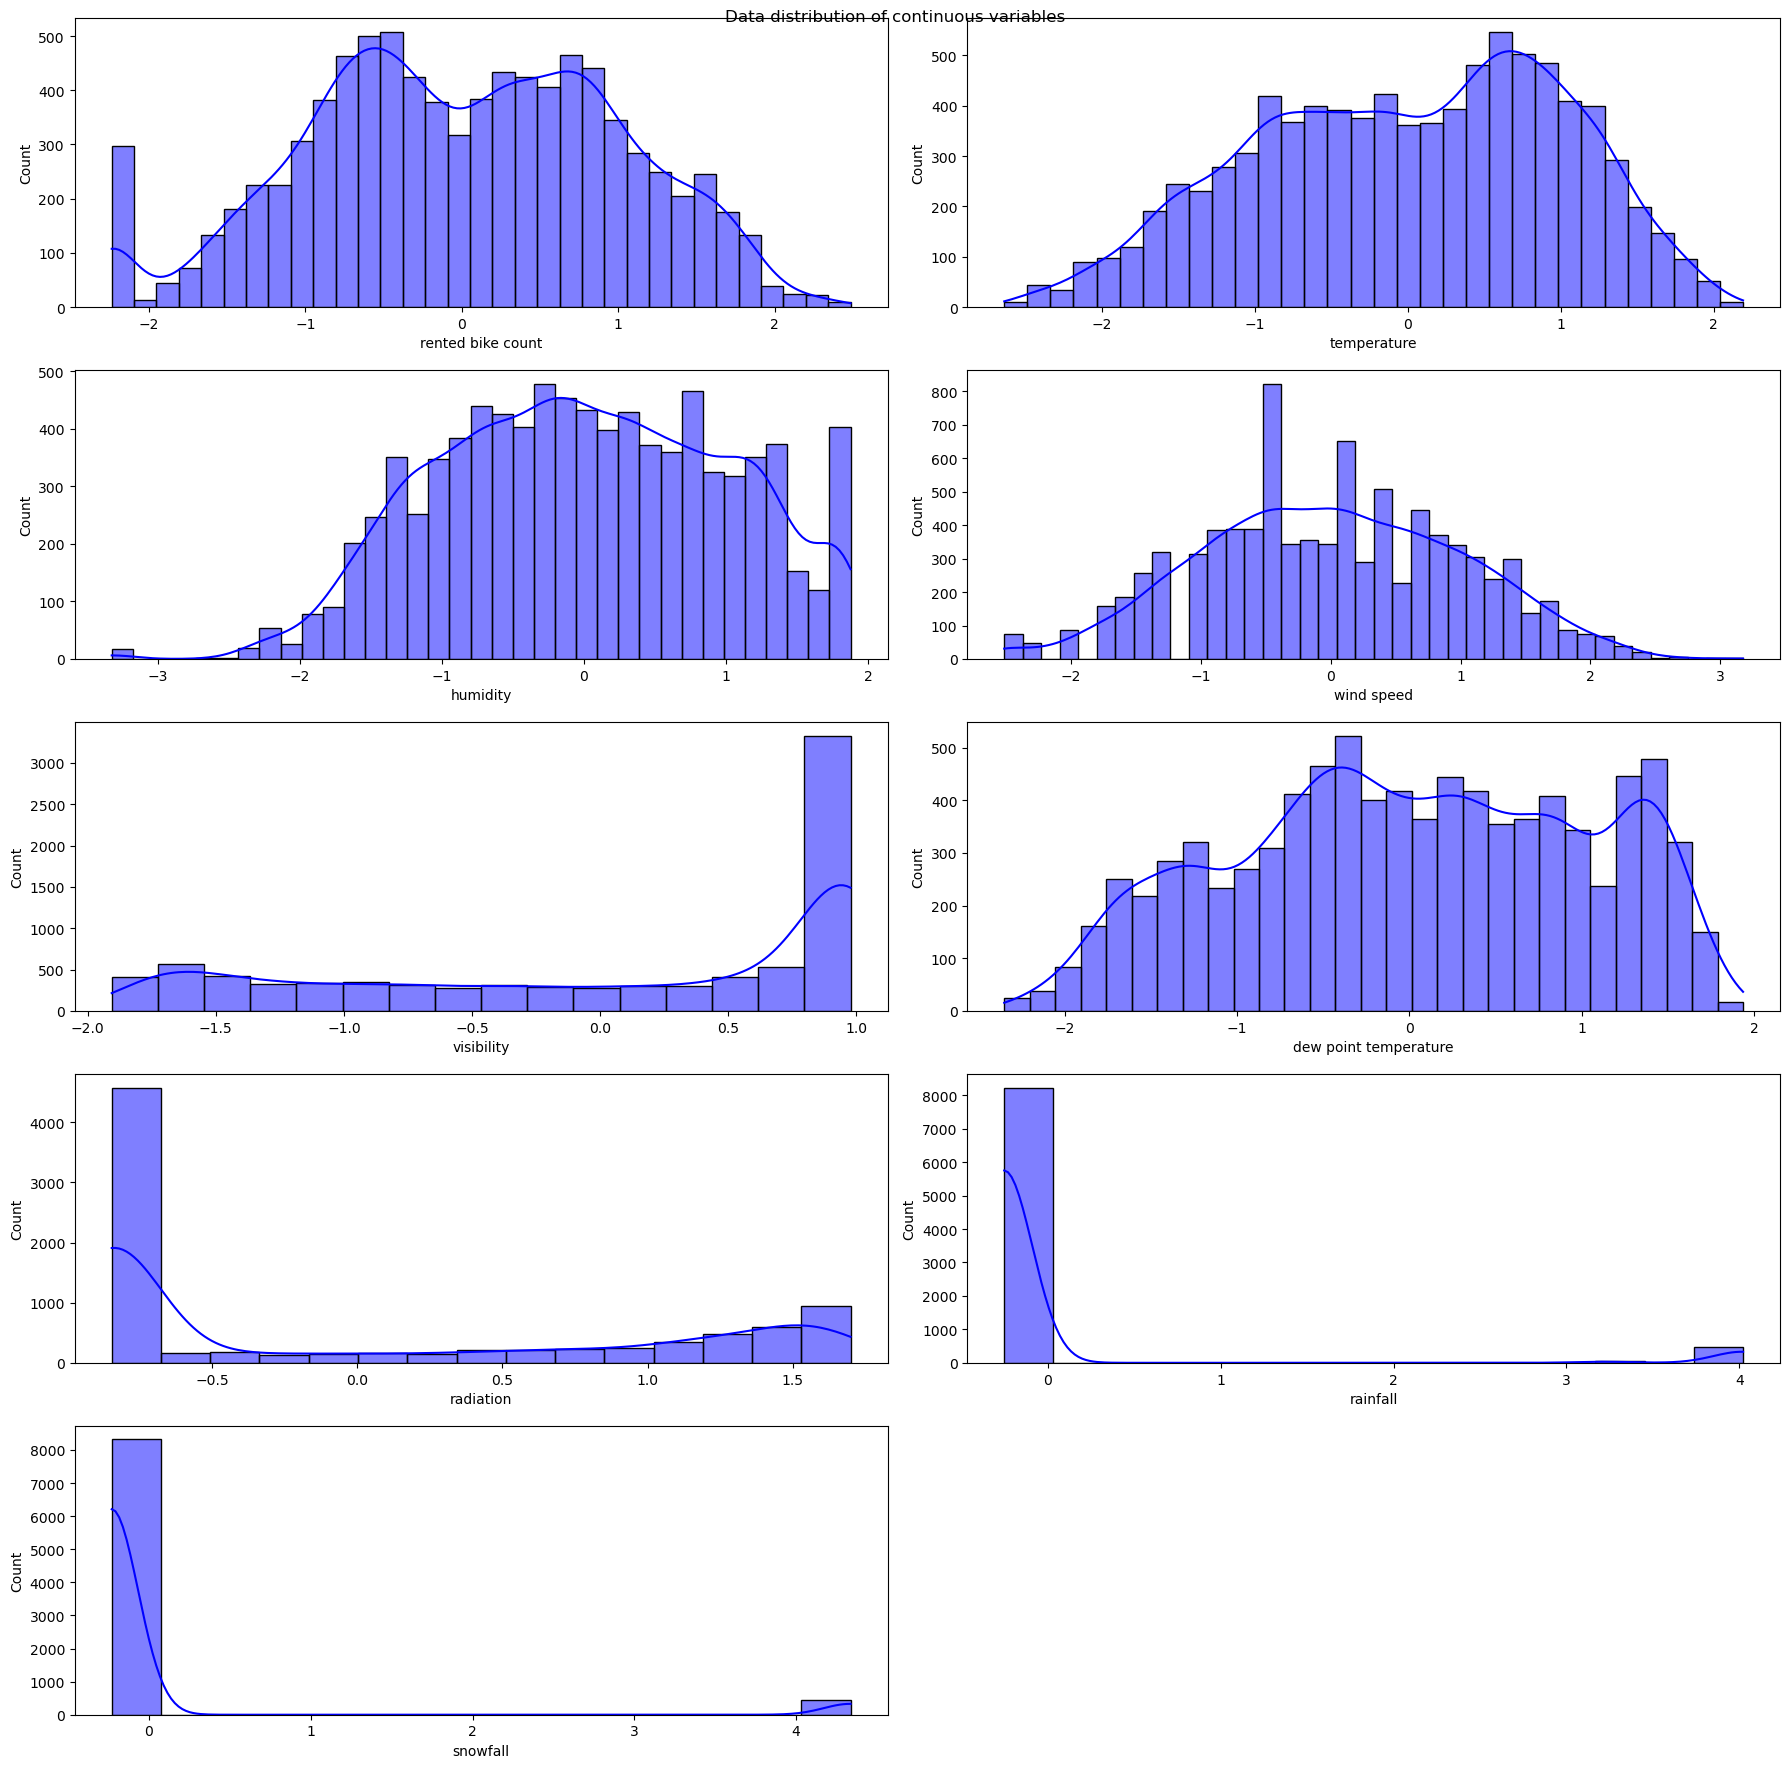

In [16]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = df, x = col, ax =ax, color = 'blue', kde = True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### box plot after applying power Transformer
### Now our Box plots look better agter treating the outliers.

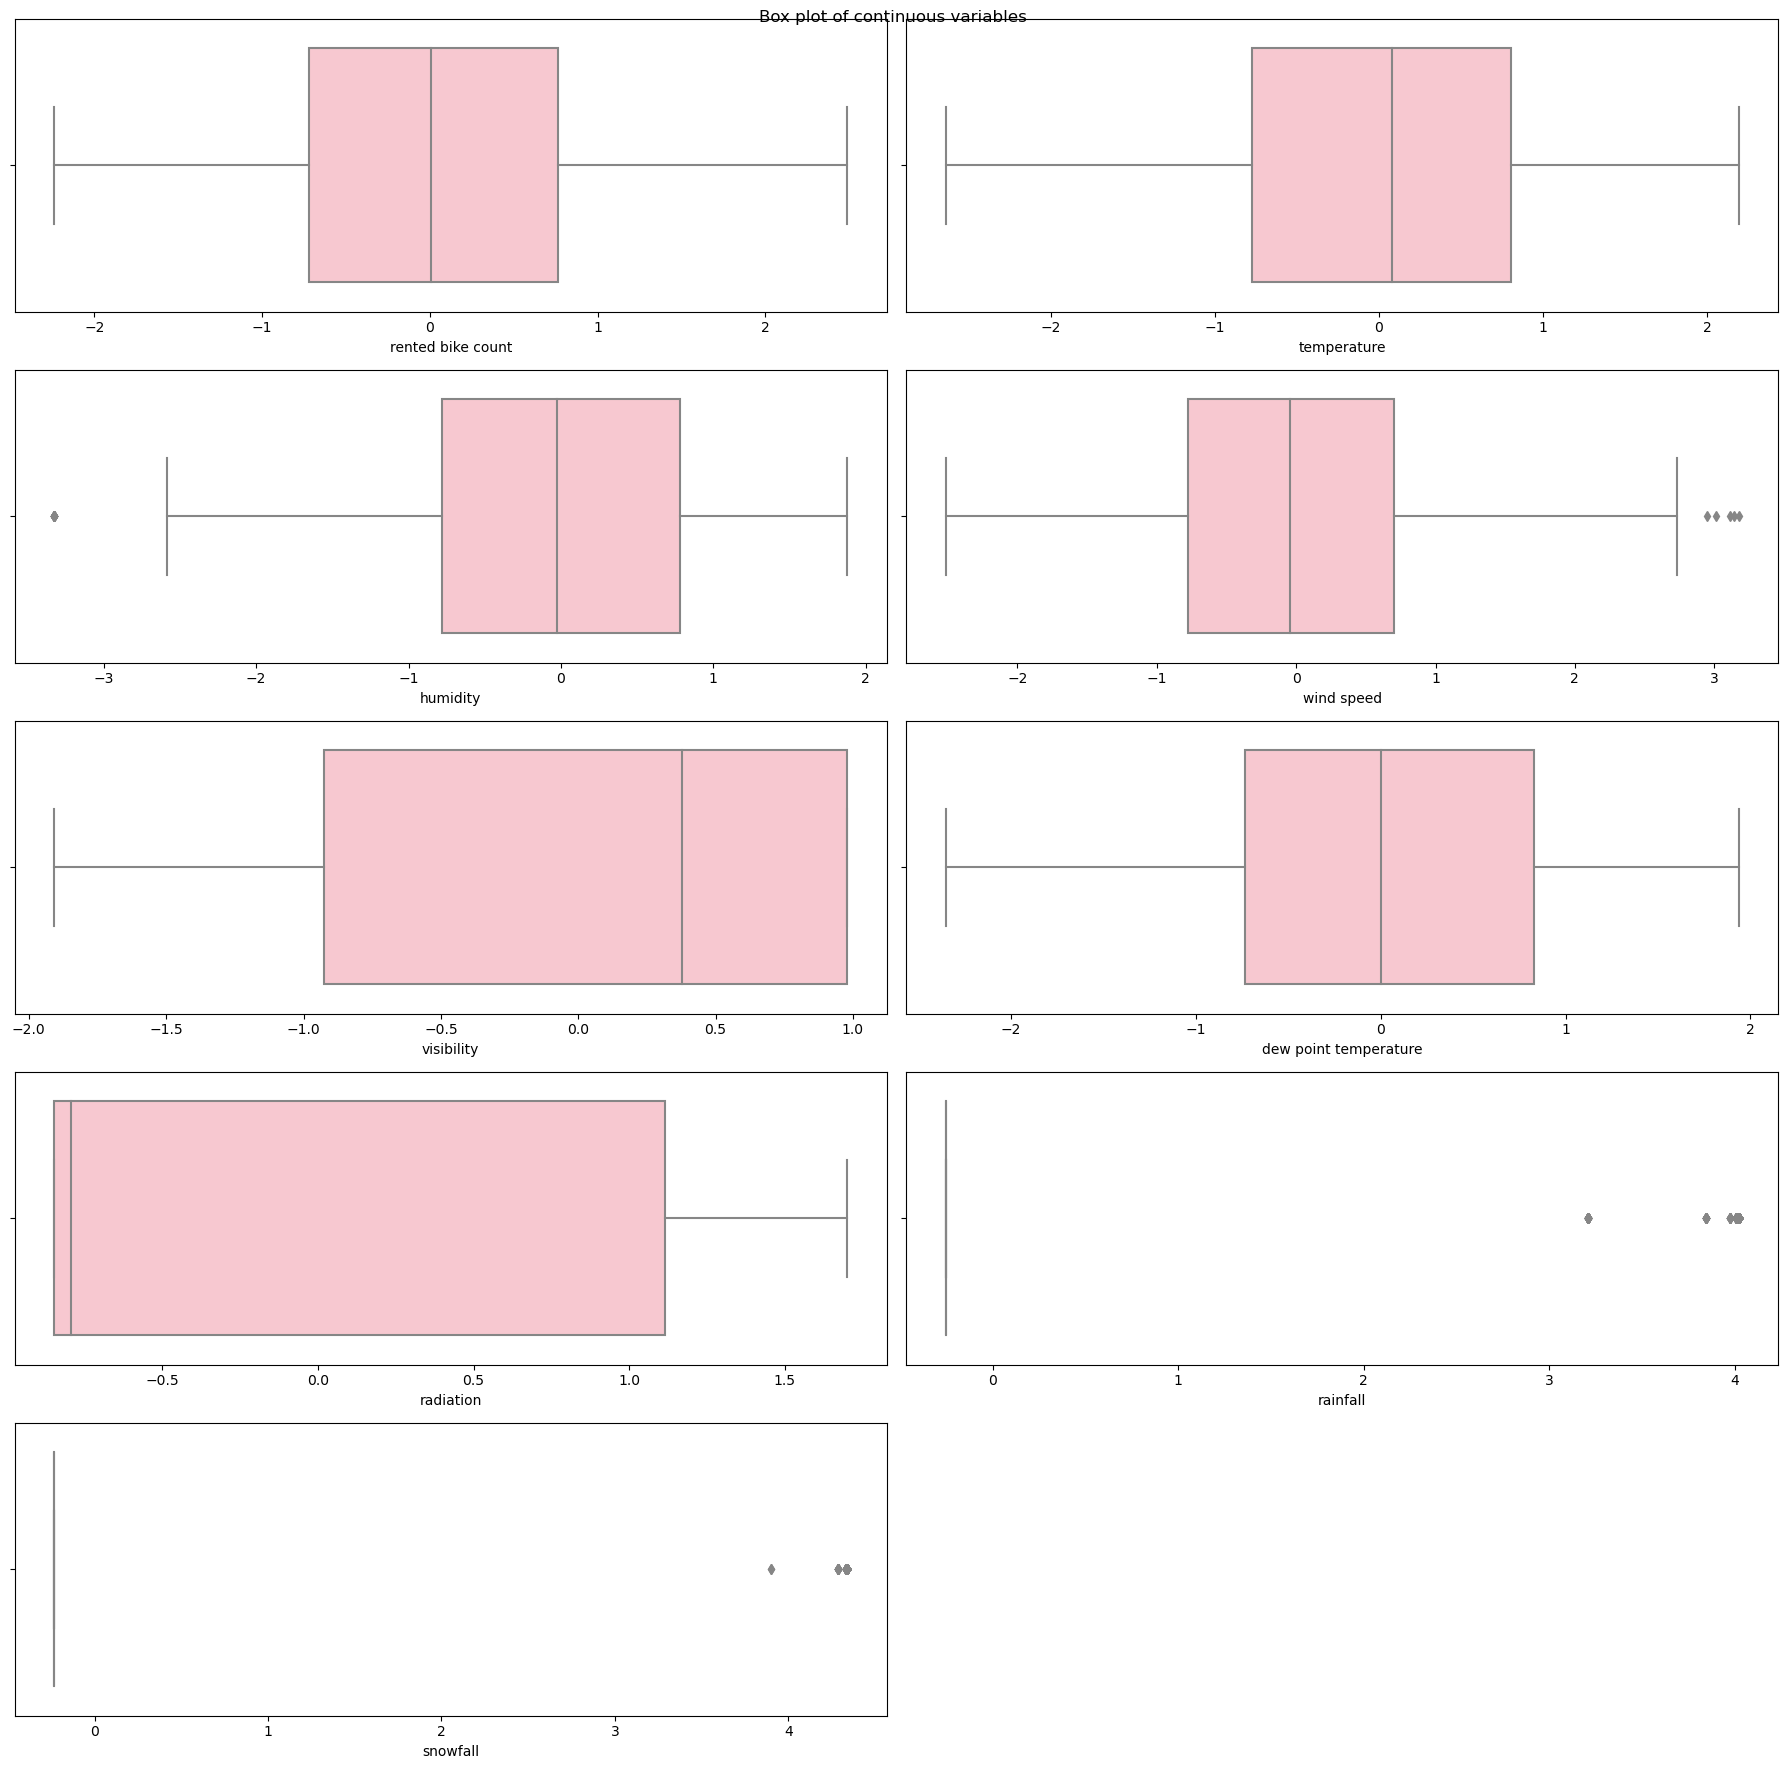

In [17]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data = df, x =col, ax = ax, color = 'pink')
plt.suptitle('Box plot of continuous variables')
plt.tight_layout()

# Heatmap

### with the help of heatmap we can find the multicolinearity between the variables of the dataset.

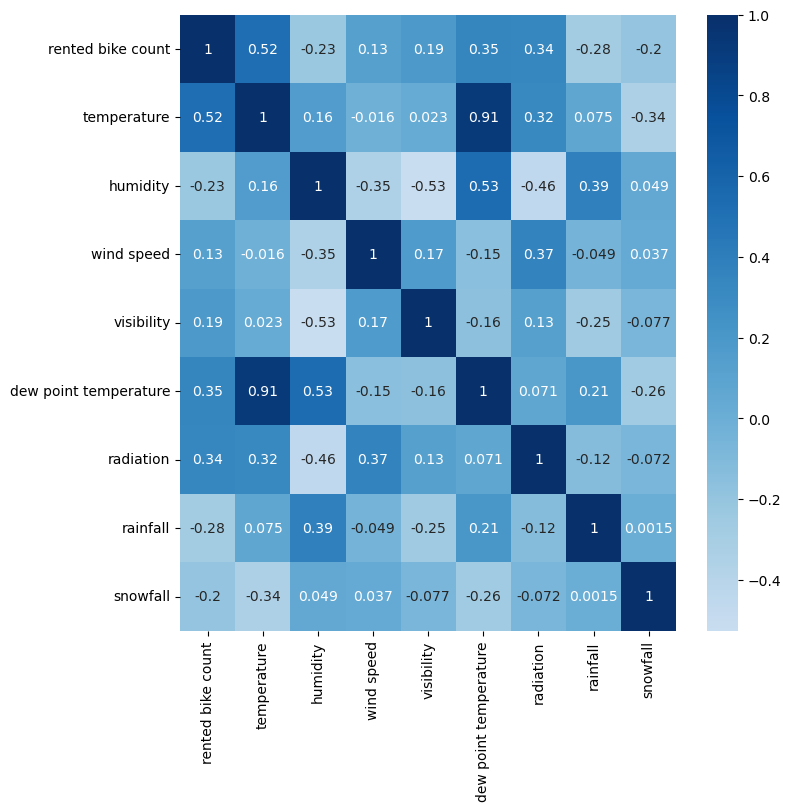

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(df[num_var].corr(), annot = True, cmap = 'Blues', center = 0)
plt.show()

### with the help of variance inflationn factor we can also find the correlation
### between the variables of the data set
A rule of thumb for interpreting the variance inflation factor:
👉 1 = not correlated.
👉 Between 1 and 5 = moderately correlated.
👉 Greater than 5 = highly correlated.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [21]:
calc_vif(df[num_var])

,variables,VIF
0,rented bike count,1.731683
1,temperature,47.196732
2,humidity,12.011760
3,wind speed,1.237722
4,visibility,1.560134
5,dew point temperature,60.543491
6,radiation,1.858374
7,rainfall,1.298203
8,snowfall,1.166784


In [22]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
num_var.remove('dew point temperature')

In [23]:
calc_vif(df[num_var])

,variables,VIF
0,rented bike count,1.723978
1,temperature,2.111455
2,humidity,2.503773
3,wind speed,1.237471
4,visibility,1.496195
5,radiation,1.827975
6,rainfall,1.296638
7,snowfall,1.162325


In [26]:
df=pd.get_dummies(df,columns =['holiday','seasons','functioning day','hour'], drop_first = True)

In [27]:
# Now we will take out the features and the target in a seperate variables X and y

X = df.iloc[:,2:]
y = df.iloc[:,1]

In [28]:
del X['dew point temperature'] #this feature is highly correlated

## features selection-

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

In [32]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)


SelectKBest(k='all', score_func=<function f_regression at 0x000002542A67CF70>)

In [33]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

### Feature importance Graph

temperature : 24.19%
humidity : 3.52%
wind speed : 1.16%
visibility : 2.43%
radiation : 8.55%
rainfall : 5.65%
snowfall : 2.65%
holiday_No Holiday : 0.53%
seasons_Spring : 0.07%
seasons_Summer : 6.95%
seasons_Winter : 13.04%
functioning day_Yes : 13.83%
hour_1 : 0.27%
hour_2 : 0.91%
hour_3 : 1.95%
hour_4 : 3.25%
hour_5 : 3.11%
hour_6 : 1.15%
hour_7 : 0.02%
hour_8 : 0.47%
hour_9 : 0.00%
hour_10 : 0.05%
hour_11 : 0.00%
hour_12 : 0.04%
hour_13 : 0.08%
hour_14 : 0.11%
hour_15 : 0.21%
hour_16 : 0.39%
hour_17 : 0.93%
hour_18 : 2.18%
hour_19 : 0.97%
hour_20 : 0.56%
hour_21 : 0.49%
hour_22 : 0.28%
hour_23 : 0.00%


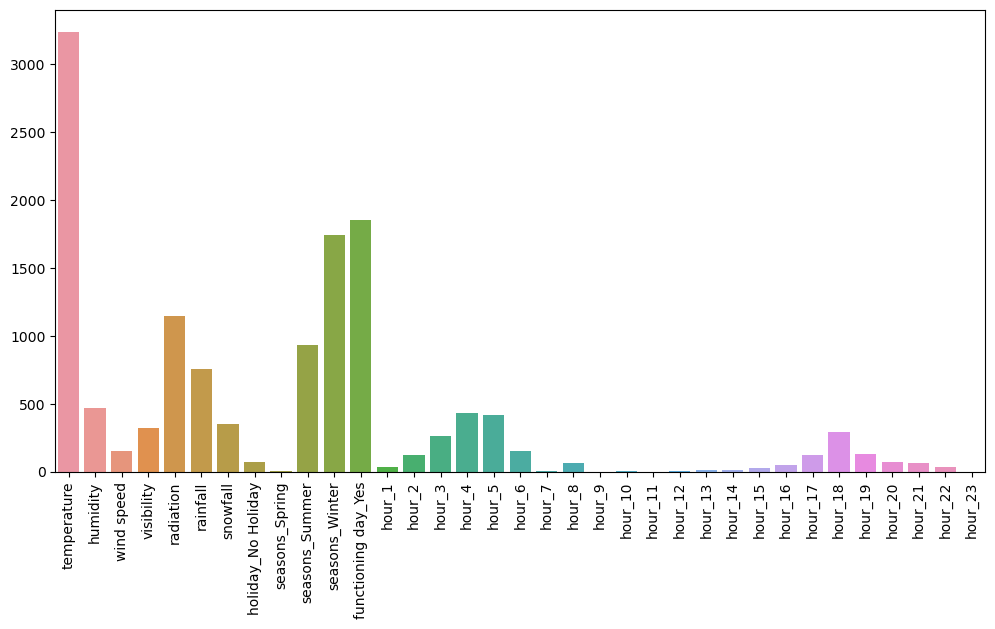

In [34]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
a = sns.barplot(x=X.columns,y=fs.scores_)
a.set_xticklabels(labels = X.columns, rotation =90)
plt.show()

### From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.

## Now we split our dataset into train and test set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

## Feature scaling
#### Here we are going to ues Standardization

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling

In [40]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [41]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Linear Regression

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


In [43]:
#### linear Regression summary

In [44]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      rented bike count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        10:47:24   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

#### assumptions of linear regression

In [46]:
residuals = lin_reg.resid
np.mean(residuals)

0.01069917702144435

#### checking for normality of the residuals

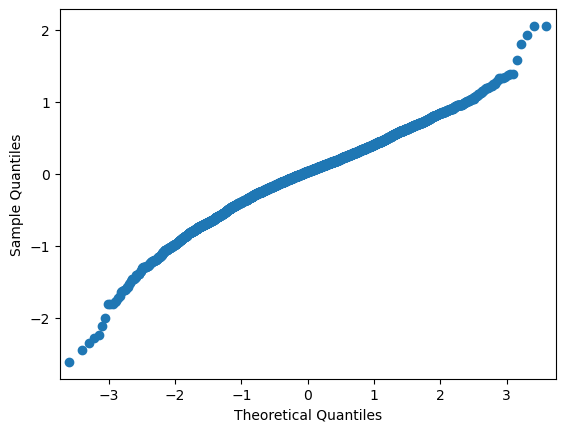

In [48]:
sm.qqplot(residuals)
plt.show()

#### checking fo r homoscedasticity

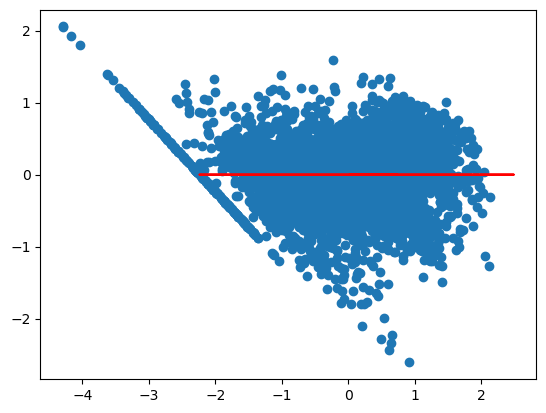

In [50]:
plt.scatter(lin_reg.predict(X_train), residuals)
plt.plot(y_train, [0]*len(y_train),c='r')

### polynomial regression

In [52]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.66%
Model MSE : 11.29%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


### decision tree regression

In [54]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.20%
Model MSE : 19.73%
Cross Val Accuracy: 78.80 %
Cross Val Standard Deviation: 1.51 %


### random forest regression

In [56]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 87.32%
Model MSE : 12.63%
Cross Val Accuracy: 88.21 %
Cross Val Standard Deviation: 0.65 %


### Bagging regressor

In [57]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.42%
Model MSE : 11.53%
Cross Val Accuracy: 89.08 %
Cross Val Standard Deviation: 0.66 %


### Stacking Regressor

In [59]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [61]:
model=StackingRegressor(estimators=estimators,final_estimator=model,passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.95%
Model MSE : 11.00%
Cross Val Accuracy: 89.66 %
Cross Val Standard Deviation: 0.54 %


### Model comparison

In [62]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,88.95%,11.00%,89.66%,0.54%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.20%,19.73%,78.80%,1.51%


#### maximum accuracies in each cols.

In [63]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,88.95%,11.00%,89.66%,0.54%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.20%,19.73%,78.80%,1.51%


#### minium accuricies in each columns

In [65]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,88.95%,11.00%,89.66%,0.54%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.20%,19.73%,78.80%,1.51%
